In [1]:
import math
import itertools

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d, r, v, alpha = sp.symbols('d r v ⍺')

In [3]:
beta = sp.asin(sp.sin(alpha)*d/r)
# beta = sp.symbols('β')
beta

asin(d*sin(⍺)/r)

In [4]:
a1_rel = d * r * sp.sin(sp.pi - alpha - beta) / 2
a1_rel /= sp.pi * r**2
a1_rel = a1_rel.subs(d/r, v)
a1_rel

v*sin(⍺ + asin(v*sin(⍺)))/(2*pi)

In [5]:
a2_rel = (alpha + beta)/(2*sp.pi)
a2_rel = a2_rel.subs(d/r, v)
a2_rel

(⍺ + asin(v*sin(⍺)))/(2*pi)

In [6]:
at_rel = sp.simplify(a1_rel+a2_rel)
at_rel

(v*sin(⍺ + asin(v*sin(⍺))) + ⍺ + asin(v*sin(⍺)))/(2*pi)

In [7]:
at_rel_diff = sp.diff(at_rel, alpha)
at_rel_diff = sp.simplify(at_rel_diff)
at_rel_diff

(v*(v*cos(⍺) + sqrt(-v**2*sin(⍺)**2 + 1))*cos(⍺ + asin(v*sin(⍺))) + v*cos(⍺) + sqrt(-v**2*sin(⍺)**2 + 1))/(2*pi*sqrt(-v**2*sin(⍺)**2 + 1))

In [8]:
sp.simplify(
    at_rel_diff.subs(sp.sqrt(1-(v*sp.sin(alpha))**2), sp.symbols('term1'))
)

(term1 + v*(term1 + v*cos(⍺))*cos(⍺ + asin(v*sin(⍺))) + v*cos(⍺))/(2*pi*term1)

In [9]:
def rel_area_fraction(alpha, v):
    term1 = alpha + math.asin(v * math.sin(alpha))
    numerator = v * math.sin(term1) + term1
    return numerator / (2 * math.pi)
def rel_area_fraction_diff(alpha, v):
    term1 = v * math.sin(alpha)
    term2 = math.sqrt(1 - term1**2)
    numerator = (term2 + v * math.cos(alpha)) * (1 + v * math.cos(alpha + math.asin(term1)))
    return numerator / (2 * math.pi * term2)

In [10]:
test_alphas = np.linspace(0, math.pi).tolist()
test_vs = np.linspace(0, 1).tolist()

for test_alpha, test_v in itertools.product(test_alphas, test_vs):
    val1 = float(at_rel.subs({v:test_v, alpha: test_alpha}).evalf())
    val2 = rel_area_fraction(alpha=test_alpha, v=test_v)
    val3 = float(at_rel_diff.subs({v:test_v, alpha: test_alpha}).evalf())
    val4 = rel_area_fraction_diff(alpha=test_alpha, v=test_v)
    np.testing.assert_almost_equal(val1, val2, err_msg='type: diff')
    np.testing.assert_almost_equal(val3, val4, err_msg='type: func')

In [11]:
def solve(func_val, v):
    assert func_val < 0.5
    alpha = func_val * 2 * math.pi
    while(True):
        func_val_cur = rel_area_fraction(alpha=alpha, v=v)
        # print(f'{alpha:.6f}\t{func_val:.6f}\t{func_val_cur:.6f}')
        if np.isclose(func_val, func_val_cur):
            break
        grad = -(func_val_cur-func_val) / rel_area_fraction_diff(alpha=alpha, v=v)
        alpha += min(abs(alpha/2), max(grad, -abs(alpha)/2))
    return alpha

In [12]:
def draw_line_at_angle(x0, y0, angle):
    plt.plot([x0, x0+math.sin(angle)*(1+v)], [y0, y0+math.cos(angle)*(1+v)], label='Line')

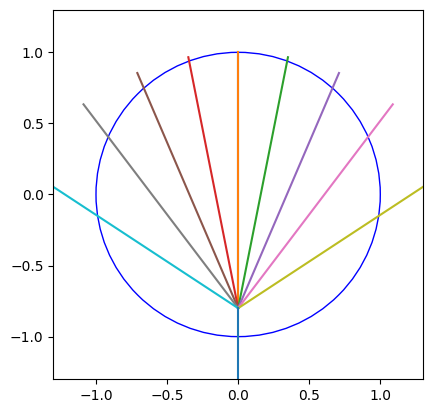

In [17]:
v = 0.8
angles = [solve(area, v) for area in [0/10, 1/10, 2/10, 3/10, 4/10]]

for angle in angles:
    draw_line_at_angle(0, -v, angle)
    draw_line_at_angle(0, -v, -angle)
draw_line_at_angle(0, -v, math.pi)

# Draw a circle
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(circle)

plt.gca().set_aspect('equal', adjustable='box')

# Set limits and show
plt.xlim(-1.3, 1.3)
plt.ylim(-1.3, 1.3)
plt.show()
